# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
np.random.seed(500)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="
#city = cities[0]
cities_df = pd.DataFrame(columns = ["City", "Lat", "Lng", "Max Temp",
                         "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"])
print("Beginning Data Retrieval")
print("---------------------------")
i = 1


for city in cities:
    print(f"Processing city {i} | {city}")
    try:
        response_json = requests.get(base_url + city).json()
        city_name = response_json['name']
        lat = response_json['coord']['lat']
        lon = response_json['coord']['lon']
        temp_max = response_json['main']['temp_max']
        hum = response_json['main']['humidity']
        clouds = response_json['clouds']['all']
        wind_speed = response_json['wind']['speed']
        country = response_json['sys']['country']
        date = response_json['dt']
        cities_df = cities_df.append({"City": city_name, 
                          "Lat": lat, 
                          "Lng": lon,
                          "Max Temp": temp_max,
                          "Humidity": hum, 
                          "Cloudiness": clouds, 
                          "Wind Speed": wind_speed,
                          "Country": country,
                          "Date": date}, ignore_index = True)
    except:
        print("City not found. Skipping...")
        pass
    i += 1


Beginning Data Retrieval
---------------------------
Processing city 1 | ponta do sol
Processing city 2 | busselton
Processing city 3 | saint george
Processing city 4 | bang saphan
Processing city 5 | bredasdorp
Processing city 6 | arica
Processing city 7 | victoria
Processing city 8 | mataura
Processing city 9 | carnarvon
Processing city 10 | alice springs
Processing city 11 | flin flon
Processing city 12 | pucallpa
Processing city 13 | saint-philippe
Processing city 14 | vaini
Processing city 15 | alotau
City not found. Skipping...
Processing city 16 | saskylakh
Processing city 17 | lolua
City not found. Skipping...
Processing city 18 | rikitea
Processing city 19 | tiksi
Processing city 20 | faanui
Processing city 21 | atuona
Processing city 22 | kapaa
Processing city 23 | tammisaari
Processing city 24 | cockburn town
Processing city 25 | lompoc
Processing city 26 | buluang
Processing city 27 | hilo
Processing city 28 | ribeira grande
Processing city 29 | turukhansk
Processing city 3

Processing city 243 | ilulissat
Processing city 244 | kindu
Processing city 245 | yamada
Processing city 246 | gladstone
Processing city 247 | qingdao
Processing city 248 | zermatt
Processing city 249 | new norfolk
Processing city 250 | georgetown
Processing city 251 | tasiilaq
Processing city 252 | niteroi
Processing city 253 | mackay
Processing city 254 | sistranda
Processing city 255 | papara
Processing city 256 | tuktoyaktuk
Processing city 257 | san quintin
Processing city 258 | limbang
Processing city 259 | santiago de cuba
Processing city 260 | mogila
Processing city 261 | kodinsk
Processing city 262 | iqaluit
Processing city 263 | onguday
Processing city 264 | samarai
Processing city 265 | vaitupu
City not found. Skipping...
Processing city 266 | jega
Processing city 267 | daru
Processing city 268 | candawaga
City not found. Skipping...
Processing city 269 | batemans bay
Processing city 270 | mar del plata
Processing city 271 | lata
Processing city 272 | karamea
City not found.

Processing city 482 | luena
Processing city 483 | atikokan
Processing city 484 | klaksvik
Processing city 485 | mahebourg
Processing city 486 | ahipara
Processing city 487 | mogadouro
Processing city 488 | tazmalt
Processing city 489 | itaituba
Processing city 490 | jining
Processing city 491 | te anau
Processing city 492 | port hedland
Processing city 493 | surt
Processing city 494 | barcelos
Processing city 495 | golden
Processing city 496 | pisco
Processing city 497 | kambove
Processing city 498 | marovoay
Processing city 499 | marawi
Processing city 500 | tasbuget
City not found. Skipping...
Processing city 501 | tatawin
Processing city 502 | louisbourg
City not found. Skipping...
Processing city 503 | bonoua
Processing city 504 | mokobeng
Processing city 505 | mugumu
Processing city 506 | weihai
Processing city 507 | gotsu
Processing city 508 | santiago
Processing city 509 | sauk rapids
Processing city 510 | mozarlandia
Processing city 511 | mentok
City not found. Skipping...
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
with open (output_data_file, "w", encoding = "utf-8", newline = "\n") as csvfile:
    cities_df.to_csv(csvfile, index = False)
csvfile.close()

In [5]:
with open(output_data_file, "r", encoding = "utf-8") as read_file:
    cities_df = pd.read_csv(read_file)

In [6]:
cities_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       555
Date          558
dtype: int64

In [7]:
cities_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ponta do Sol,32.67,-17.10,71.60,64,40,10.29,PT,1593574192
1,Busselton,-33.65,115.33,54.00,84,72,5.01,AU,1593573942
2,Saint George,37.10,-113.58,84.99,10,1,6.93,US,1593574193
3,Bang Saphan,11.21,99.51,87.80,74,40,5.82,TH,1593574193
4,Bredasdorp,-34.53,20.04,46.40,93,0,4.70,ZA,1593574193
...,...,...,...,...,...,...,...,...,...
553,Whithorn,18.26,-78.04,80.60,78,20,4.70,JM,1593574250
554,Keetmanshoop,-26.58,18.13,51.80,40,0,10.29,NaN,1593574250
555,Vicuña,-30.03,-70.71,50.00,70,79,4.81,CL,1593574250
556,Grants,35.15,-107.85,69.80,13,1,8.05,US,1593574250


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,5.580000e+02
mean,18.092240,19.725341,68.155896,71.586022,50.621864,8.043459,1.593574e+09
std,33.619379,93.652228,14.141317,20.156273,37.899262,5.582745,6.268958e+01
min,-54.800000,-175.200000,23.000000,10.000000,0.000000,0.360000,1.593573e+09
25%,-10.340000,-66.747500,58.317500,60.000000,9.000000,3.830000,1.593574e+09
50%,20.360000,22.310000,69.800000,77.000000,52.500000,6.930000,1.593574e+09
75%,45.627500,108.160000,79.020000,87.000000,90.000000,10.480000,1.593574e+09
max,78.220000,179.320000,96.960000,100.000000,100.000000,34.450000,1.593574e+09


In [9]:
#  Get the indices of cities that have humidity over 100%.
humid = cities_df.loc[cities_df["Humidity"] > 100]
humid_len = len(humid)
print(f"There are {humid_len} cities that have humidity over 100%.")

There are 0 cities that have humidity over 100%.


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [11]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv

#cities_df.to_csv("cities_weather_data.csv")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(*args, **kw)>

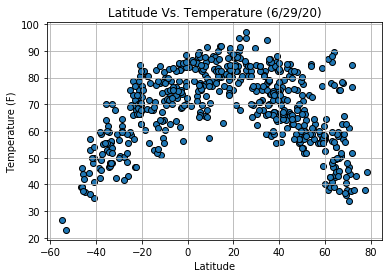

In [12]:
plt.scatter(cities_df["Lat"], cities_df["Max Temp"], edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Latitude Vs. Temperature (6/29/20)")
plt.grid(b = True, axis = "both", which = "major")
plt.savefig("output_data/Fig1.png")
plt.show

## Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(*args, **kw)>

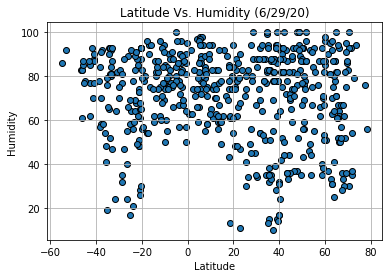

In [13]:
plt.scatter(cities_df["Lat"], cities_df["Humidity"], edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude Vs. Humidity (6/29/20)")
plt.grid(b = True, axis = "both", which = "major")
plt.savefig("output_data/Fig2.png")
plt.show

## Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(*args, **kw)>

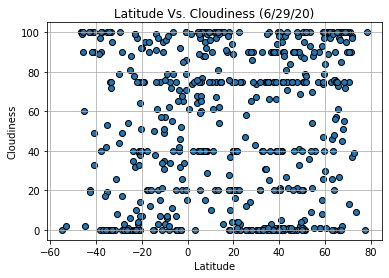

In [14]:
plt.scatter(cities_df["Lat"], cities_df["Cloudiness"], edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude Vs. Cloudiness (6/29/20)")
plt.grid(b = True, axis = "both", which = "major")
plt.savefig("output_data/Fig3.png")
plt.show

## Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(*args, **kw)>

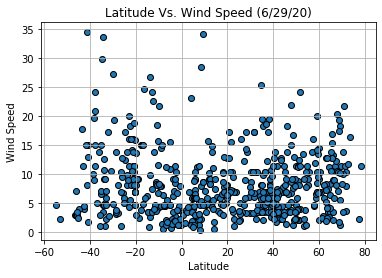

In [15]:
plt.scatter(cities_df["Lat"], cities_df["Wind Speed"], edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude Vs. Wind Speed (6/29/20)")
plt.grid(b = True, axis = "both", which = "major")
plt.savefig("output_data/Fig4.png")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

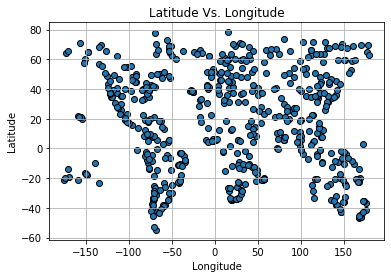

In [16]:
#for fun: Latitude vs. Longitude
plt.scatter(cities_df["Lng"], cities_df["Lat"], edgecolors="black")
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.title("Latitude Vs. Longitude")
plt.grid(b = True, axis = "both", which = "major")
plt.show

## Linear Regression

In [17]:
# OPTIONAL: Create a function to create Linear Regression plots
lati = cities_df["Lat"]
temp_max = cities_df["Max Temp"]

def lr(x,y, title, text_coordinates):
    temp_slope, temp_int, temp_r, temp_p, temp_std_err = st.linregress(x, y)
    temp_fit = x * temp_slope + temp_int
    best_fit = f"y = {round(temp_slope, 2)} x + {round(temp_int, 2)}"
  
    plt.scatter(x, y)
    plt.xlabel("Latitude")
    plt.ylabel(title)
    plt.annotate(best_fit, text_coordinates, fontsize = 15, color = "red")
    plt.plot(x,temp_fit,"--", color = "red")
    print(f"The r-squared is {temp_r ** 2}.")
    plt.show()
    

In [18]:
# Create Northern and Southern Hemisphere DataFrames

north_h = cities_df.loc[cities_df["Lat"] > 0]
south_h = cities_df.loc[cities_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is 0.45725872341801366.


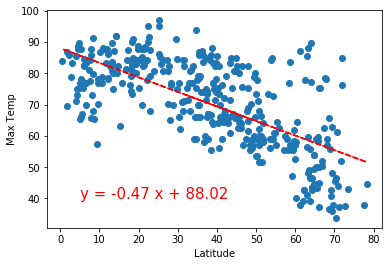

In [19]:
x = north_h["Lat"]
y = north_h["Max Temp"]
lr(x,y, 'Max Temp', (5,40))


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is 0.5937229290004252.


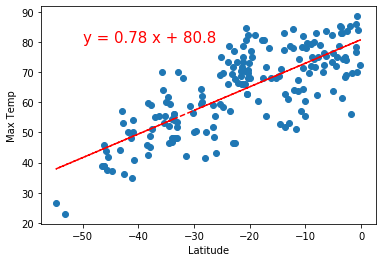

In [20]:
x = south_h["Lat"]
y = south_h["Max Temp"]

lr(x,y, 'Max Temp', (-50, 80))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.009790887587198866.


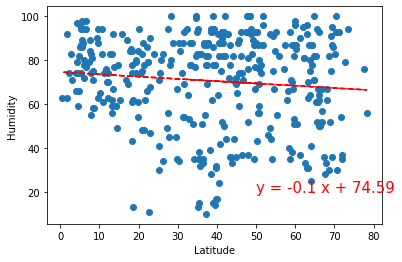

In [21]:
x = north_h["Lat"]
y = north_h["Humidity"]

lr(x,y, "Humidity", (50, 20))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.007041254689485774.


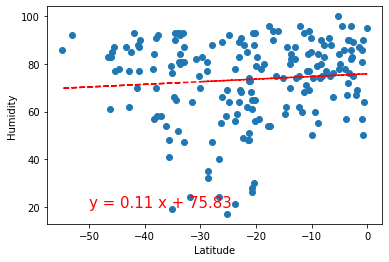

In [22]:
x = south_h["Lat"]
y = south_h["Humidity"]

lr(x,y, "Humidity", (-50,20))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 0.0013720773170679138.


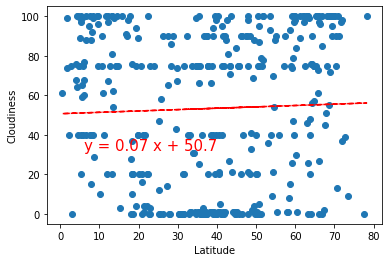

In [23]:
x = north_h["Lat"]
y = north_h["Cloudiness"]

lr(x,y, "Cloudiness", (6,32))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 0.002251710253109329.


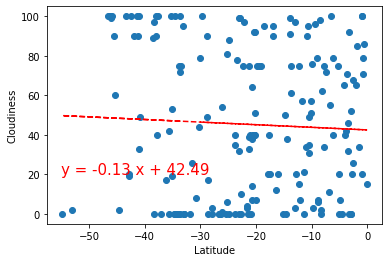

In [24]:
x = south_h["Lat"]
y = south_h["Cloudiness"]

lr(x,y, "Cloudiness", (-55,20))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is 0.02298495438789948.


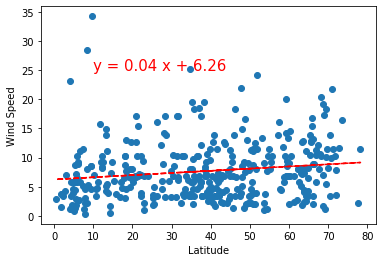

In [25]:
x = north_h["Lat"]
y = north_h["Wind Speed"]

lr(x,y, "Wind Speed", (10,25))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is 0.026256893280659607.


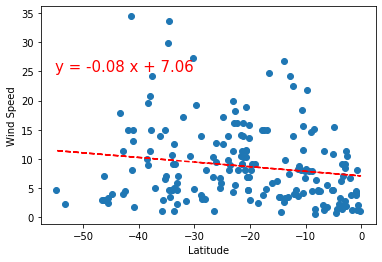

In [26]:
x = south_h["Lat"]
y = south_h["Wind Speed"]

lr(x,y, "Wind Speed", (-55,25))